# Pandas: conhecendo a biblioteca
Esse notebook tem por objetivo conter todos os códigos realizados para estudar a biblioteca pandas

## Objetivos do Curso

Neste curso, trabalharemos como cientistas de dados de uma empresa imobiliária. Vamos desenvolver um projeto em que aprenderemos a:

- Explorar características gerais de uma base de dados
- Realizar análises exploratórias com diferentes métodos
- Lidar com valores nulos
- Remover registros inconsistentes
- Aplicar filtros
- Criar diferentes colunas
- E muito mais

## [Trello](https://trello.com/b/0xrow8tk/pandas-conhecendo-a-biblioteca)

# Códigos:

## Bibliotecas

In [1]:
import pandas as pd

## 1 - Conhecendo a base de dados

### Consumindo a Base de Dados

> **OBS:** Na leitura da base de dados, tive que utilizar o argumento `sep=`, pois o separador/delimitador do arquivo CSV, que normalmente é `,`, neste DataSet é `;`.

> **OBS2:** Uma outra forma de escrever esse código é usar o argumento `delimiter`, que aprendemos na biblioteca NumPy. O código ficaria desse jeito:

```python
dados = pd.read_csv(url, delimiter=";")
```

> Porém nessa [pergunta no StackOverFlow](https://stackoverflow.com/questions/49532873/what-is-the-difference-between-sep-and-delimiter-attributes-in-pandas-read-c) diz que é mais recomendado utilizar o `sep`

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"

dados = pd.read_csv(url, sep = ";")

dados.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0


### Explorando as características dos dados
Exploraremos:
- Quantidade de linhas e colunas `dados.shape`
- Quais são as colunas `dados.columns`
- Informações do DataSet `dados.info()`

In [3]:
tamanho_dataset = dados.shape
colunas = dados.columns
tipo_colunas = dados.dtypes
tipo_colunas_array = []

print(f"Nossa base de dados tem {tamanho_dataset[0]} linhas e {tamanho_dataset[1]} colunas\n")

for i in range(len(colunas)):
  tipo_colunas_array.append(tipo_colunas[i])

dados_coluna_tipos = pd.DataFrame()
dados_coluna_tipos["Coluna"] = colunas
dados_coluna_tipos["Tipo"] = tipo_colunas_array
print(dados_coluna_tipos)

info_dataset = dados.info()

Nossa base de dados tem 32960 linhas e 9 colunas

       Coluna     Tipo
0        Tipo   object
1      Bairro   object
2     Quartos    int64
3       Vagas    int64
4      Suites    int64
5        Area    int64
6       Valor  float64
7  Condominio  float64
8        IPTU  float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


## 2 - Análise exploratória de dados

### Análise exploratória dos dados

#### 1 - Quais os valores médios por tipo de imóvel?

Para calcular os valores médios por tipo de imóvel, utilizaremos a função nativa `groupby` do Pandas, que permite agrupar dados com base em elementos iguais. Aqui está o passo a passo dessa análise:

1. **Agrupamento dos Dados**:
   - Usamos a função `groupby` para agrupar os dados com base no tipo de imóvel.
   
2. **Seleção da Coluna**:
   - Após o agrupamento, selecionamos a coluna "Valor" da tabela para calcular a média.

3. **Retorno**:
   - O retorno será uma Series, onde a coluna representando o tipo de imóvel será utilizada como índice (Index) e os valores correspondentes serão as médias calculadas.

4. **Transformando em DataFrame**
  - Após isso transformaremos essa series em um novo DataFrame

5. **Resultado Final:**
  - Plotaremos o resultado alcançado em um gráfico

Dessa forma, obteremos uma visão clara dos valores médios por cada tipo de imóvel presente nos dados.


In [4]:
# Agrupando os dados por tipo
dados_agrupados_por_tipo = dados.groupby("Tipo")

# Selecionando a coluna "Valor"
media_valor_por_imovel = dados_agrupados_por_tipo["Valor"].mean().sort_values()

<Axes: ylabel='Tipo'>

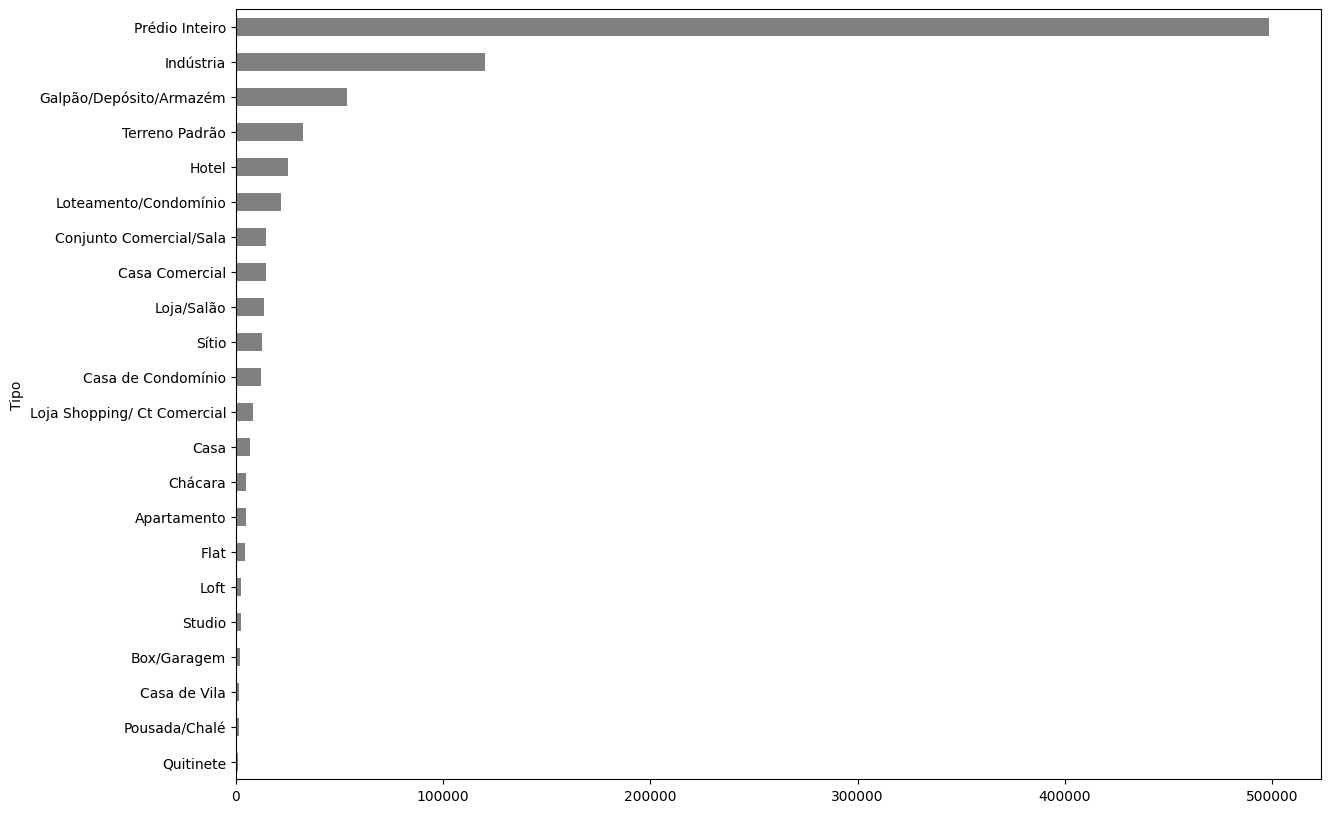

In [5]:
media_valor_por_imovel.plot(kind="barh", figsize=(14, 10), color="gray")

In [6]:
# Armazenando todos os tipos de imoveis em uma array
tipos_imoveis = dados['Tipo'].unique()

for tipo in tipos_imoveis:
  print(f"O valor médio do {tipo} é de R$ {media_valor_por_imovel[tipo]:.2f}")

O valor médio do Quitinete é de R$ 1246.84
O valor médio do Casa é de R$ 6793.45
O valor médio do Conjunto Comercial/Sala é de R$ 14715.05
O valor médio do Apartamento é de R$ 4744.61
O valor médio do Casa de Condomínio é de R$ 11952.06
O valor médio do Prédio Inteiro é de R$ 498637.24
O valor médio do Flat é de R$ 4546.19
O valor médio do Loja/Salão é de R$ 13769.65
O valor médio do Galpão/Depósito/Armazém é de R$ 53407.06
O valor médio do Casa Comercial é de R$ 14478.26
O valor médio do Casa de Vila é de R$ 1574.37
O valor médio do Terreno Padrão é de R$ 32567.71
O valor médio do Box/Garagem é de R$ 1899.76
O valor médio do Loft é de R$ 2557.88
O valor médio do Loja Shopping/ Ct Comercial é de R$ 8126.18
O valor médio do Chácara é de R$ 4900.00
O valor médio do Loteamento/Condomínio é de R$ 22000.00
O valor médio do Sítio é de R$ 12499.00
O valor médio do Pousada/Chalé é de R$ 1480.00
O valor médio do Studio é de R$ 2400.00
O valor médio do Hotel é de R$ 25000.00
O valor médio do Ind

#### 2 - Remoção de imóveis do tipo comercial

In [7]:
# Trecho ja fornecido pela instrutora
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [8]:
imoveis_residenciais = dados.query("@imoveis_comerciais not in Tipo")
imoveis_residenciais.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0


#### 3 - Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [9]:
percentual_imovel_residencial = round(imoveis_residenciais["Tipo"].value_counts(normalize=True), 4)*100

tipos_imoveis_residenciais = imoveis_residenciais["Tipo"].unique()

for tipo_residencia in tipos_imoveis_residenciais:
  print(f"O tipo {tipo_residencia} representa {percentual_imovel_residencial[tipo_residencia]}% da base de dados")

O tipo Quitinete representa 3.62% da base de dados
O tipo Casa representa 4.18% da base de dados
O tipo Apartamento representa 84.50999999999999% da base de dados
O tipo Casa de Condomínio representa 4.31% da base de dados
O tipo Flat representa 2.06% da base de dados
O tipo Casa de Vila representa 1.08% da base de dados
O tipo Loft representa 0.22% da base de dados
O tipo Studio representa 0.02% da base de dados


<Axes: xlabel='Tipo de Imóvel', ylabel='Percentual'>

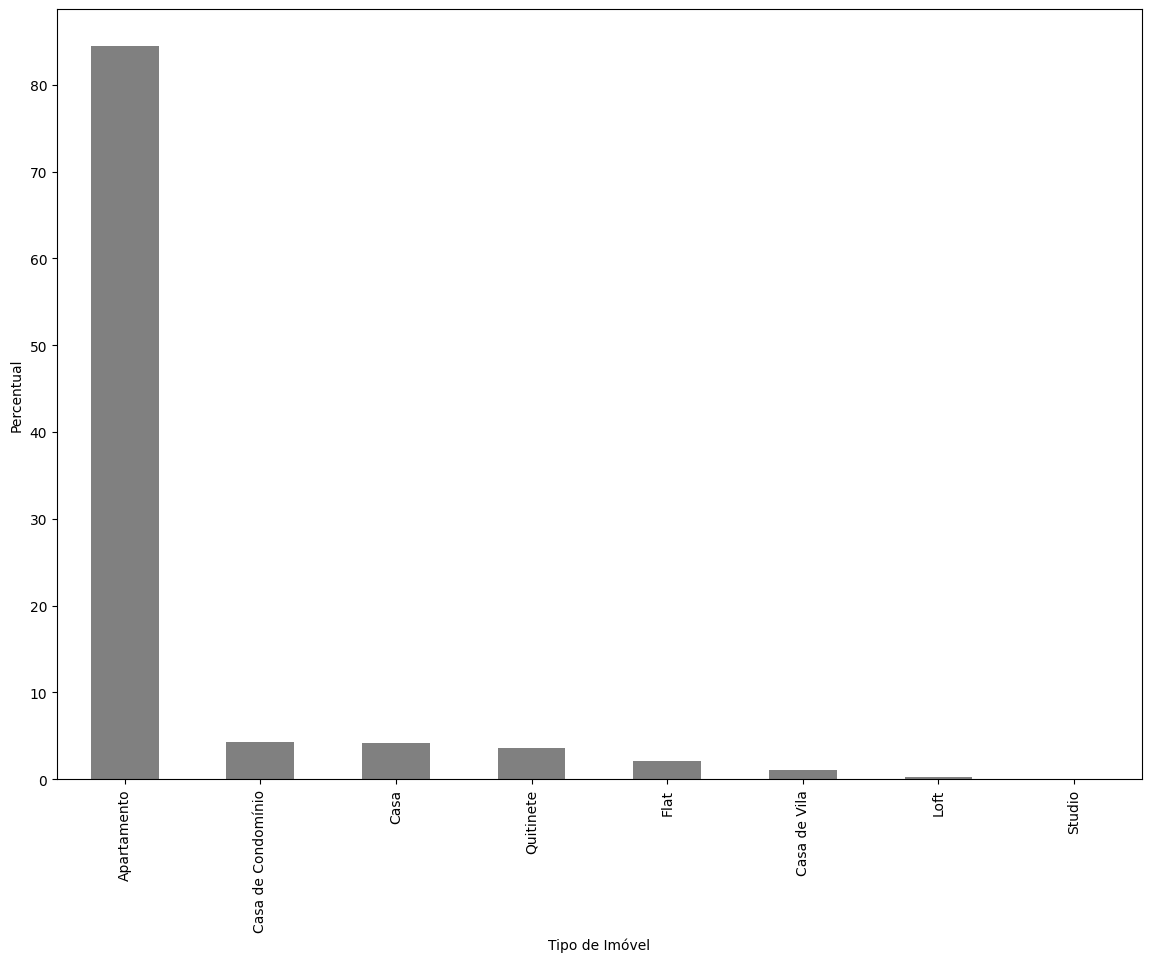

In [10]:
percentual_imovel_residencial.plot(kind="bar", figsize=(14,10), color="gray", xlabel="Tipo de Imóvel", ylabel="Percentual")

#### 4 - Selecionando Apenas Imóveis do Tipo Apartamento

Casas e apartamentos possuem características bastante distintas. Dado que apartamentos representam mais de 80% do nosso dataset, decidimos focar nossa análise exclusivamente nesse tipo de imóvel. Com isso, conseguiremos obter insights mais precisos e relevantes para a maioria dos dados disponíveis.


In [11]:
imoveis_apartamentos = imoveis_residenciais.query("Tipo == 'Apartamento'")
imoveis_apartamentos.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


### Desafios

#### 1 - Calcular a média de quartos por apartamento

In [12]:
media_quartos = round(imoveis_apartamentos["Quartos"].mean(), 0)
print(f"A média de quartos por apartamento é de {media_quartos}")

A média de quartos por apartamento é de 2.0


#### 2 - Conferir quantos bairros únicos existem na base de dados

In [13]:
qntd_bairros = len(dados["Bairro"].unique())
print(f"A base de dados possui {qntd_bairros} bairros únicos")

A base de dados possui 162 bairros únicos


#### 3 - Analisar quais bairros possuem a média de valor de aluguel mais elevada

In [14]:
imoveis_bairro = dados.groupby("Bairro")

imoveis_bairro["Valor"].mean().sort_values(ascending=False)

Bairro
Jacarepaguá         314143.489637
Irajá               154610.470588
Caju                120264.782609
Vasco da Gama       120000.000000
Cidade Nova          88166.692308
                        ...      
Inhoaíba               738.888889
Turiaçu                733.333333
Magalhães Bastos       726.666667
Santíssimo             709.090909
Senador Camará         635.000000
Name: Valor, Length: 162, dtype: float64

#### 4 - Criar um gráfico de barra horizontais que apresente os 5 bairros com as médias de aluguel mais elevadas

<Axes: ylabel='Bairro'>

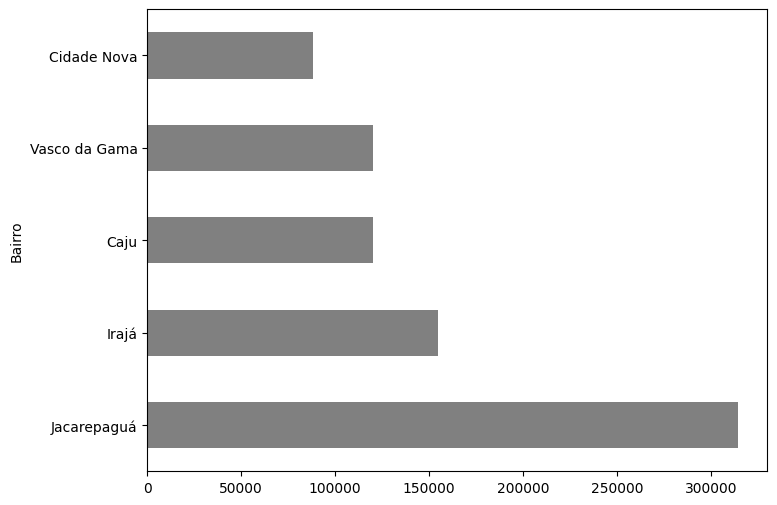

In [15]:
top_5_bairros = imoveis_bairro["Valor"].mean().sort_values(ascending=False).head(5)
top_5_bairros.plot(kind="barh", figsize=(8,6), color="gray")

## 3 - Tratando e filtrando dados

### Tratando dados nulos
Tratar dados nulos em um Dataset é extramamente importante, pois esses dados faltantes podem interferir na qualidade da análise. Quando existem dados nulos, podem ocorrer problemas como vié, redução de acurácia e imprecisão nas informações obtidas

Podemos tratar dados nulos de 3 formas:
- **Removendo dados nulos:** Podemos remove os dados nulos utilizando as função `dropna()`, na qual remove todas as linhas com valor nulo
- **Prencher dados nulos:** Podemos substituir os dados nulos utilizando as função `fillna()`, na qual substitui os valores nulos por um valor especificao
- **Interpolar os dados nulos:** podemos preencher os dados nulos com valores interpolados, ou seja, calculados a partir dos vizinhos. Fazemos isso utilizando a função `interpolate()`

Primeiramente iremos utilizar a função `ìsnull()` onde ela retorna um DataFrame com valores booleanos, onde **False** significa que a coluna **não tem valores nuls** e **True** que a coluna **tem valores nulos**

In [16]:
imoveis_apartamentos.isnull().head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True


Após isso iremos verificar quais colunas possuem valores nulos e quantos valores nulos elas possuem. Para isso utilizaremos a função `sum()`

In [17]:
imoveis_apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

Por fim substituiremos o valores nulos por 0

In [18]:
imoveis_apartamentos = imoveis_apartamentos.fillna(0)
imoveis_apartamentos.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

### Removendo registros
Alguns registros existentes na base de dados não fazem muito sentido, por exemplo:

- Apartamentos que possuem valor de aluguel igual a 0;
- Apartamentos com o valor do condomínio igual a 0.

Esses registros são inconsistentes, por isso devemos removê-los da nossa base de dados.

Primeiro iremos fazer uma **query** para pegar os registros que tem o valor do alugue e o condomíniio igual a 0 e pegar o index desses móveis com essas características.

In [19]:
registro_a_remover = imoveis_apartamentos.query("Valor == 0 | Condominio == 0").index

Utilizaremos a função `drop()` para remover as colunas com os registros de valor e condomínio iguais a 0, mas para isso passaremos os seguintes argumentos:
- `index_de_remoção`
- `axis`: Esse argumento serve para remover linhas (Caso seja igual a 0) ou colunas (Caso seja igual a 1)
- `inplace`: Remove sem precisar criar um novo DataFrame

In [20]:
imoveis_apartamentos.drop(registro_a_remover, axis=0, inplace=True)

Por fim removeremos a coluna tipo, uma vez que já é sabido que ela só contém apartamentos, não há necessidade de mantê-las

In [21]:
imoveis_apartamentos.drop("Tipo", axis=1, inplace=True)

In [22]:
imoveis_apartamentos.head(3)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0


### Aplicando filtros
1. Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;

2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

Com base nisso, precisamos aplicar os filtros necessários para obter essas informações específicas.

In [23]:
filtro1 = imoveis_apartamentos[(imoveis_apartamentos["Quartos"] == 1) & (imoveis_apartamentos["Valor"] < 1200)]
filtro1.head(3)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0


In [24]:
filtro2 = imoveis_apartamentos[(imoveis_apartamentos["Quartos"] >= 2) & (imoveis_apartamentos["Valor"] < 3000) & (imoveis_apartamentos["Area"] > 70)]
filtro2.head(3)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0


### Salvando dados
Iremos salvar o Dataframe utilizando a função `to_csv` na qual o primeiro parâmetro é o nome do arquivo que será criado e o segundo parâmetro é utilizado para desconsiderar a coluna index

In [25]:
imoveis_apartamentos.to_csv("dados_apartamentos.csv", index=False, sep=";")

In [26]:
teste = pd.read_csv("dados_apartamentos.csv", sep=";")
teste.head(3)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0


### Desafios

#### Consumindo base do desafio

In [27]:
dados_alunos = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv")
dados_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


#### 1. Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

In [28]:
dados_alunos.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [29]:
# Já que os alunos não estão com nota podemos supor que eles estão com 0
dados_alunos = dados_alunos.fillna(0)

In [30]:
dados_alunos.isnull().sum()

Nome        0
Idade       0
Notas       0
Aprovado    0
dtype: int64

#### 2. Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

In [31]:
alice_carlos = dados_alunos.query("Nome == 'Alice' | Nome == 'Carlos'").index
dados_alunos.drop(alice_carlos, axis=0, inplace=True)

#### 3. Aplique um filtro que selecione apenas os alunos que foram aprovados.

In [32]:
alunos_aprovado = dados_alunos[dados_alunos["Aprovado"] == True]
alunos_aprovado

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


#### 4. Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [33]:
alunos_aprovado.to_csv("alunos_aprovado.csv", index=False)

## 4 - Manipulando os dados

### Criando colunas numéricas
- valor_por_mes: essa coluna deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio;
- valor_por_ano: essa coluna deve conter os gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio.

In [34]:
dados = dados.fillna(0)

In [35]:
dados['valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0


In [36]:
dados['valor_por_ano'] = ((dados['Valor'] + dados['Condominio']) * 12) + dados['IPTU']
dados.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0


### Criando coluna categórica
- Descrição: essa coluna deve possuir uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem;

In [37]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + dados['Quartos'].astype(str) + ' quarto(s) e ' + dados['Vagas'].astype(str) + ' vagas de garagem'

In [38]:
dados.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...


### Criando coluna binária
- Possui_suite: essa deve ser uma coluna que informe apenas se o imóvel possui ou não suítes, sem se importar com a quantidade.

In [39]:
dados["Possui_suite"] = dados['Suites'].apply(lambda x: "Sim" if x > 0 else "Não")
dados.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não


### Desafio

#### Consumindo base de dados

In [48]:
dados_alunos = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv")
dados_alunos = dados_alunos.fillna(0)

1. Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

In [50]:
dados_alunos["Pontos_extras"] = dados_alunos["Notas"].apply(lambda x: x*0.4)
dados_alunos.head(3)

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0


2. Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [51]:
dados_alunos["Notas_finais"] = dados_alunos["Notas"] + dados_alunos["Pontos_extras"]
dados_alunos.head(3)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5


3. Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

- True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
- False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [56]:
dados_alunos["Aprovado_final"] = dados_alunos["Notas_finais"].apply(lambda x: True if x >= 6 else False)
dados_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,0.0,False,0.00,0.00,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,0.0,False,0.00,0.00,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,0.0,False,0.00,0.00,False


4. Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [58]:
selecao = (dados_alunos['Aprovado'] == False) & (dados_alunos['Aprovado_final'] == True)
dados_alunos[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
